In [1]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


In [2]:
conn = sqlite3.connect("../Data/products.db")
df = pd.read_sql_query("SELECT * FROM Products", conn)
conn.close()

df.head()

,product_id,name,price,brand,type,color,category_id,cluster_id_no_price
0,1,Laptop HP 15,1200.0,HP,Laptop,Silver,1,None
1,2,Gaming Mouse,45.0,Logitech,Mouse,Black,1,None
2,3,Red Lipstick,25.0,Maybelline,Lipstick,Red,2,None
3,4,Foundation Cream,60.0,L'Oréal,Foundation,Beige,2,None
4,5,Office Desk,350.0,IKEA,Desk,Brown,3,None


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           20 non-null     int64  
 1   name                 20 non-null     object 
 2   price                20 non-null     float64
 3   brand                20 non-null     object 
 4   type                 20 non-null     object 
 5   color                20 non-null     object 
 6   category_id          20 non-null     int64  
 7   cluster_id_no_price  0 non-null      object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ KB


In [4]:
df["price"].describe()

count      20.000000
mean      224.200000
std       334.997345
min        18.000000
25%        38.000000
50%        72.500000
75%       212.500000
max      1200.000000
Name: price, dtype: float64

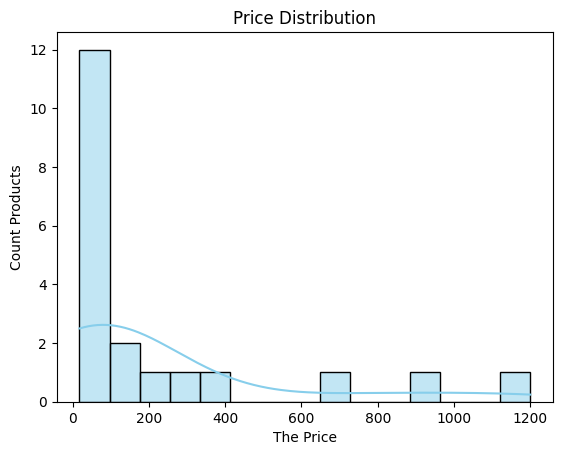

In [5]:
sns.histplot(df["price"], kde=True, bins=15, color="skyblue")
plt.title("Price Distribution")
plt.xlabel("The Price")
plt.ylabel("Count Products")
plt.show()